## IS6 in Python: Regression Wisdom (Chapter 8)

### Introduction and background

This document is intended to assist students in undertaking examples shown in the Sixth Edition of Intro Stats (2022) by De Veaux, Velleman, and Bock. This pdf file as well as the associated ipynb reproducible analysis source file used to create it can be found at (INSERT WEBSITE LINK HERE).

#### Chapter 8: Regression Wisdon

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

#### Section 8.1: Examining Residuals
#### Getting the "Bends": When the residuals aren't straight

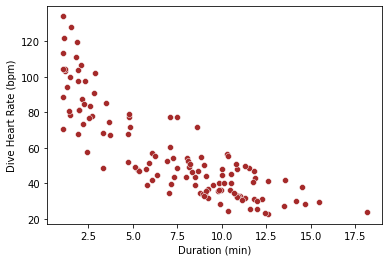

In [2]:
penguins = pd.read_csv("datasets/penguins.txt", sep = "\t")
penguins

#Figure 8.1, page 248
sns.scatterplot(data = penguins, x = "Duration(min)", y = "Dive Heart Rate", color = "brown")
plt.xlabel("Duration (min)")
plt.ylabel("Dive Heart Rate (bpm)")
plt.show()

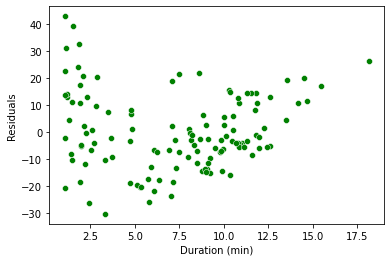

In [3]:
#Figure 8.2
#Fit linear regression model
x = penguins["Duration(min)"]
y = penguins["Dive Heart Rate"]
x = sm.add_constant(x)
model = sm.OLS(y,x)
result = model.fit()

#Plot residuals against duration
sns.scatterplot(x = penguins["Duration(min)"], y = result.resid, color = "green")
plt.xlabel("Duration (min)")
plt.ylabel("Residuals")
plt.show()

#### Sifting Residuals for Groups

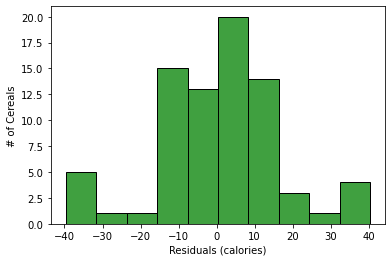

In [4]:
#Figure 8.3, page 249
cereals = pd.read_csv("datasets/cereals.txt", sep = "\t")
cereals

#Fit linear model
x = cereals["sugars"]
y = cereals["calories"]
x = sm.add_constant(x)
model = sm.OLS(y,x)
result = model.fit()

#Plot the histogram of residuals
sns.histplot(x = result.resid, color = "green", binwidth = 8)
plt.xlabel("Residuals (calories)")
plt.ylabel("# of Cereals")
plt.show()

Question: Figure 8.4 is a bit too complex. Should I try to include it here?

In [5]:
print(cereals.groupby("shelf")["shelf"].count())

shelf
1    20
2    21
3    36
Name: shelf, dtype: int64


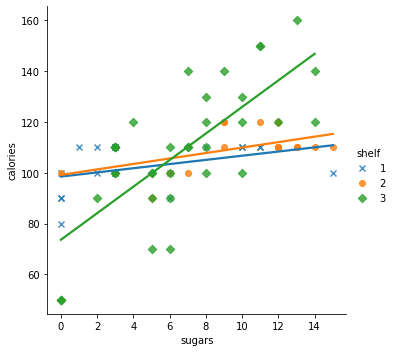

In [6]:
#Figure 8.5
sns.lmplot(data = cereals, x = "sugars", y = "calories", hue = "shelf", ci = None, markers = ["x", "o", "D"])
plt.show()

#### Section 8.2: Extrapolation: Reaching Beyond the Data
See displays on paaage 251 - 252
#### Example 8.1 : Extrapolation: Reaching Beyond the Data

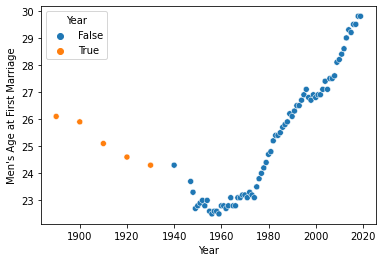

In [7]:
marriage = pd.read_csv("datasets/marriage_age_2019.txt", sep = "\t")
marriage

sns.scatterplot(data = marriage, x = "Year", y = "Men", hue = marriage["Year"] < 1940)
plt.xlabel("Year")
plt.ylabel("Men's Age at First Marriage")
plt.show()

Question: How to specify multiple conditions in the hue parameter? (Section year into 3 parts)
#### Section 8.3: Outliers, Leverage, and Influence

In [15]:
#Figure 8.10, page 255
election = pd.read_csv("datasets/election-2000.txt", sep = "\t")

#Make linear model
x = sm.add_constant(election["Nader"])
y = election["Buchanan"]
model = sm.OLS(y,x)
result = model.fit()

#Summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               Buchanan   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     48.59
Date:                Fri, 22 Jul 2022   Prob (F-statistic):           1.95e-09
Time:                        14:38:26   Log-Likelihood:                -485.17
No. Observations:                  67   AIC:                             974.3
Df Residuals:                      65   BIC:                             978.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.2563     51.640      0.973      0.3

In [16]:
#Make linear model
data = election[election["Buchanan"] <= 3000]
x = sm.add_constant(data["Nader"])
y = data["Buchanan"]
model = sm.OLS(y,x)
result = model.fit()

#Summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               Buchanan   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     293.3
Date:                Fri, 22 Jul 2022   Prob (F-statistic):           1.38e-25
Time:                        14:39:07   Log-Likelihood:                -394.06
No. Observations:                  66   AIC:                             792.1
Df Residuals:                      64   BIC:                             796.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.5279     14.512      4.791      0.0

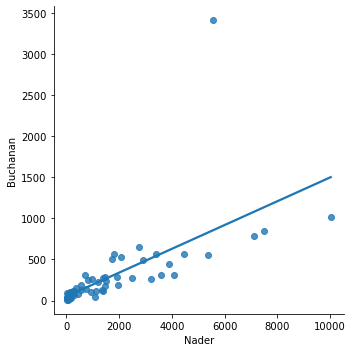

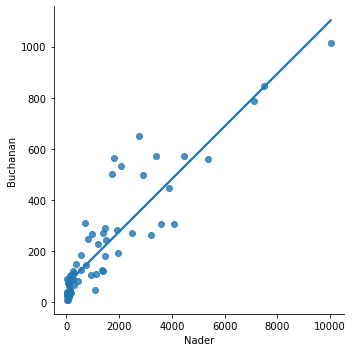

In [23]:
#Figure 8.10, page 255
sns.lmplot(data = election, x = "Nader", y = "Buchanan", ci = None)
sns.lmplot(data = data, x = "Nader", y = "Buchanan", ci = None)
plt.show()

Question: How to change the y-axis range from 0 - 1000 to 0 - 3500?

See page 256 for example of high-leverage point
#### Section 8.4: Lurking Variables with Causation

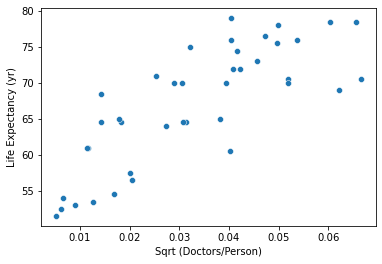

In [25]:
#Figure 8.14, page 257
doctors = pd.read_csv("datasets/doctors-and-life-expectancy.txt", sep = "\t")
doctors

sns.scatterplot(data = doctors, x = "sqrtDoctors.person", y = "life.exp")
plt.xlabel("Sqrt (Doctors/Person)")
plt.ylabel("Life Expectancy (yr)")
plt.show()

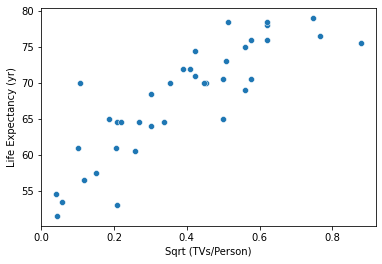

In [29]:
sns.scatterplot(data = doctors, x = "sqrtTV.person", y = "life.exp")
plt.xlabel("Sqrt (TVs/Person)")
plt.ylabel("Life Expectancy (yr)")
plt.show()

#### Example 8.2: Using Several of These Methods Together

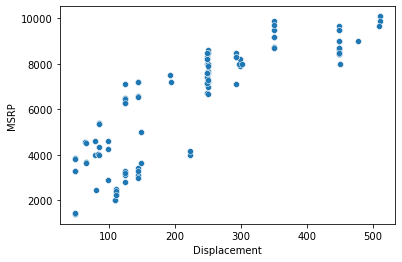

In [57]:
#page 259
bikes = pd.read_csv("datasets/dirt-bikes-2014.txt", sep = "\t")
bikes

sns.scatterplot(data = bikes, x = "Displacement", y = "MSRP")
plt.show()

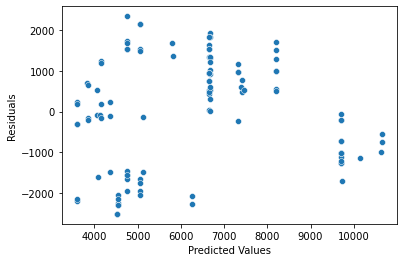

In [33]:
#Fit linear model
x = sm.add_constant(bikes["Displacement"])
y = bikes["MSRP"]
model = sm.OLS(y,x)
result = model.fit()

#Make predictions
yhat = result.fittedvalues
residuals = result.resid

#Plot
sns.scatterplot(x = yhat, y = residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

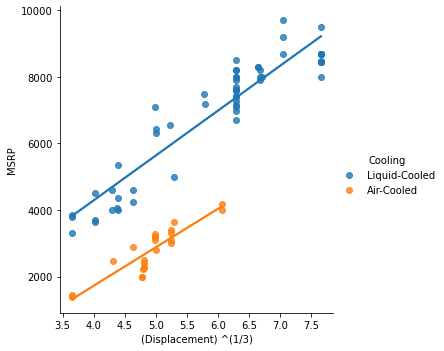

In [60]:
#Mutate Displacement column
bikes = bikes.assign(new_dist = bikes["Displacement"] ** (1/3))

#Plot linear regression
sns.lmplot(data = bikes, x = "new_dist", y = "MSRP", ci = None, hue = "Cooling", hue_order = ["Liquid-Cooled", "Air-Cooled"])
plt.xlabel("(Displacement) ^(1/3)")
plt.show()

#### Section 8.5: Working with Summary Values
We can also work with summary values